# Appendix 14 - Textual Analysis (Overall & By Time Period)

## 1. Overall 
#### Visualisation of word frequencies in the speech, in the twitter corpus, and hashtag frequencies

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import string

In [2]:
# Import the speech
speech = pd.read_excel("speechoutput2.xlsx")
# Import the tweets
tweets = pd.read_excel("06sotu_with_timestamps.xlsx")

In [3]:
# For the speech: add a timestamp column which contains the total seconds elapsed since the start of the speech (for easier analysis)
import datetime

speech['timestamp']=""

x = datetime.datetime.strptime('2018-01-31 02:10:16', '%Y-%m-%d %H:%M:%S')
y = datetime.timedelta(days =43129, hours=2, minutes=10, seconds=14)

for i in range(len(speech)):
    speech.at[i, "timestamp"] = (speech.at[i, "tweettime"] - x).total_seconds()

speech['timestamp']=speech['timestamp'].astype(int)
print(speech['timestamp'].dtype)

int32


### Define functions to perform textual analysis

In [4]:
# This function takes a dataframe (or a subset thereof) as an argument, along with a descriptor of its type
# It returns a word frequency distribution text in a specified for that dataset

def getWordFrequencies(text, text_type):
    if text_type == "speech":
        # Put input in one long string
        a = text['content'].str.upper().str.cat(sep=' ')
    
        # Remove punctuation
        # Create a dictionary mapping every character in python's inbuild string.punctuation 'list' to None
        translate_table = dict((ord(char), None) for char in string.punctuation)
        # Apply the dictionary to the speech string in order to remove punctuation
        a2 = a.translate(translate_table)
    
        # Tokenize words
        speechwords = nltk.tokenize.word_tokenize(a2)
    
        # Remove stopwords 
        stop_words = set(stopwords.words('english'))
        stop_words_upper = [element.upper() for element in stop_words]
        speechwords_filtered = [w for w in speechwords if not w in stop_words_upper]
    
        # Produce frequency table of top 50 words used in tweet corpus
        word_dist = nltk.FreqDist(speechwords_filtered)
        return(word_dist)
    
    elif text_type == "tweets":
        # Put input in one long string
        a = text['text'].str.cat(sep=' ')
    
        # Tokenize words
        tweetwords = nltk.tokenize.word_tokenize(a)
    
        # Remove stopwords including AMP & ellipsis (which had ended up evading pre-processing!)
        stop_words = list(stopwords.words('english'))
        stop_words.append("AMP")
        stop_words.append("…")
        stop_words_upper = [element.upper() for element in stop_words]
        tweetwords_filtered = [w for w in tweetwords if not w in stop_words_upper]
    
        # Produce frequency table of top 50 words used in tweet corpus
        word_dist = nltk.FreqDist(tweetwords_filtered)
        return(word_dist)


In [5]:
# This function takes a word frequency distribution as an argument, and a number specifying how many words you want to view
# It returns a pd dataframe showing the [number] most common words and their frequencies
def getWordFrequencyTable(frequencydist, number):
    a = pd.DataFrame(frequencydist.most_common(number))
    a = a.sort_values(by=[1], ascending=False)
    a = a.reset_index()
    return a

In [6]:
# This function takes a word frequency distribution as an argument, and a string which is what you want to save your word cloud as
# It generates and saves as PNG file a wordcloud based on that frequency distribution
def saveWordCloudFromFreq(frequencydist, maskname, filename):
    # Generate wordcloud from the frequencies previously extracted
    mask = np.array(Image.open(maskname))
    wc = WordCloud(background_color="white", mask = mask)
    wc.generate_from_frequencies(frequencydist)
    wc.to_file(filename + ".png")
    print("wordcloud saved as " + filename + ".png")

In [7]:
# This function takes a pandas dataframe as an argument, and produces a barchart
def getBarChart(dataframe, title, colormap_value):
    return dataframe.sort_values(by=[1], ascending=False).plot(x=0, y=1, kind='bar', title = title, colormap = colormap_value, legend=False, sort_columns=False)

### Visualisation of word frequencies in the speech

In [8]:
# Call methods above
speech_all_words = getWordFrequencies(speech, 'speech')
speech_all_word_table = getWordFrequencyTable(speech_all_words, 50)
saveWordCloudFromFreq(speech_all_words, "trump.jpg", "speech_all_words")
# Plot bar chart
speech_all_word_table.sort_values(by=[1], ascending=False).plot(x=0, y=1, kind='bar', sort_columns=False, figsize=(20,10))

wordcloud saved as speech_all_words.png


### Visualisation of word frequencies in the twitter corpus

wordcloud saved as tweets_all_words.png


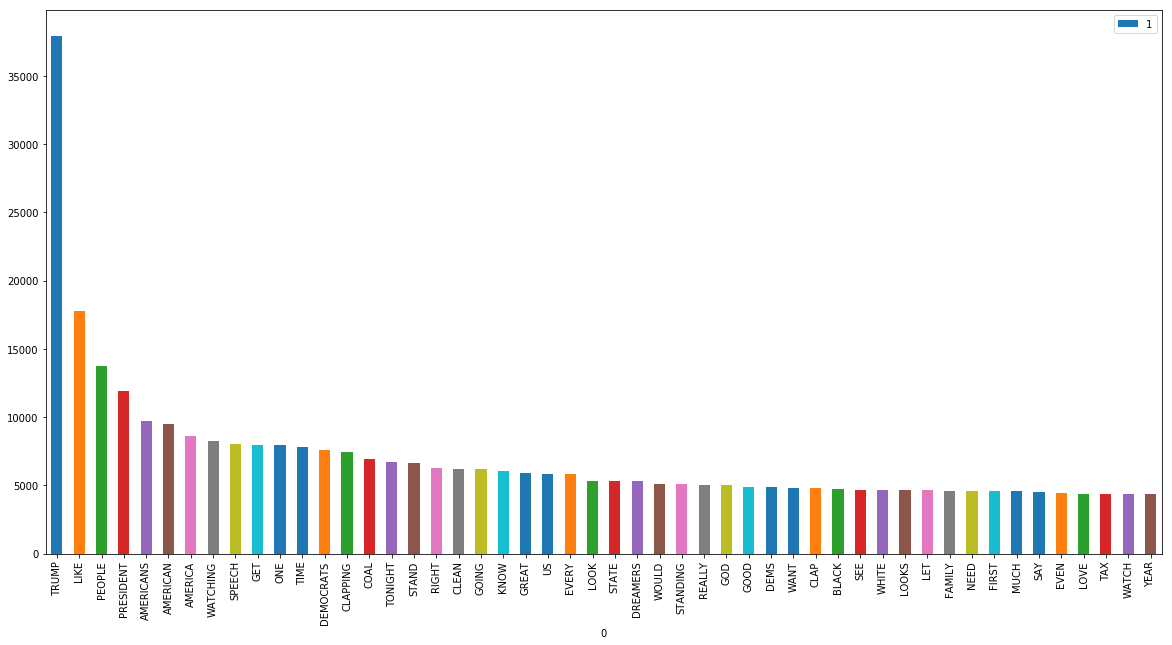

In [9]:
tweets_all_words = getWordFrequencies(tweets, 'tweets')
tweets_all_word_table = getWordFrequencyTable(tweets_all_words, 50)
saveWordCloudFromFreq(tweets_all_words, "twitter_logo.jpg", "tweets_all_words")
tweets_all_word_table.sort_values(by=[1], ascending=False).plot(x=0, y=1, kind='bar', sort_columns=False, figsize=(20,10))

### Visualisation of hashtag frequencies

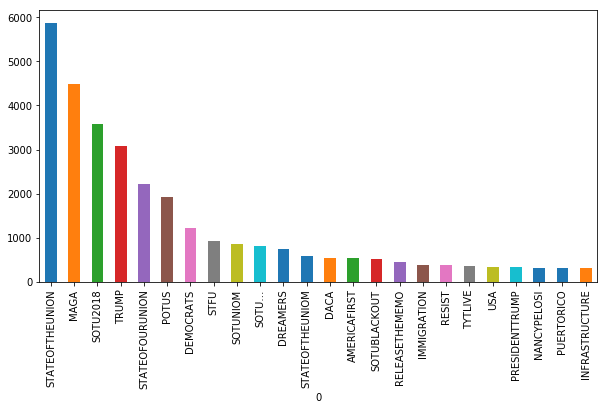

In [11]:
# Process hashtags into string
a_hashtags = tweets['text_hashtags'].str.cat(sep=' ')
    
# Tokenize
hashtags = nltk.tokenize.word_tokenize(a_hashtags)
    
# Produce frequency table of top 50 words used in tweet corpus
hashtag_word_dist = nltk.FreqDist(hashtags)
# Put top 25 hashtags in table
hashtag_word_table = getWordFrequencyTable(hashtag_word_dist, 25)
# Drop the SOTU hashtag, which is by definition attached to every tweet
hashtag_word_table_noSOTU = hashtag_word_table.drop([0])
# Plot on bar graph
hashtag_word_table_noSOTU.sort_values(by=[1], ascending=False).plot(x=0, y=1, kind='bar', sort_columns=False, legend = False, figsize=(10,5))

## By Time Period

## Analysis of seconds 390-960

(=10 minute duration)

In [12]:
# Loop to view the speech in full for seconds 390 - 960
a_390960=""
for i in range(len(speech)):
    if ((speech.at[i, 'timestamp'] >= 390) &  (speech.at[i,'timestamp'] <= 960)):
        a_390960+= (speech.at[i, 'content'])
print(a_390960)

This is really the key these are the people we were elected to serve
Thank you
Over the last year the world has seen
What we always know that no people on earth are so fearless or daring or determine as
Americans if there is a mountain we climb it if there's a frontier we cross it
if there's a challenge we tame it if
There's an opportunity we seize it
So let's begin tonight by
Recognizing that the state of our union is strong
Because our people are strong
And together we are building a safe strong and proud
America. Since the election we have created 2.4 million new jobs
including
Including 200,000 new jobs in manufacturing alone tremendously
After years and years of wage stagnation. We are finally seeing rising wages
Unemployment claims have hit a 45 year low and
Something I'm very proud of african-american unemployment stands at the lowest rate ever recorded
And Hispanic American unemployment has also reached the lowest levels in history
Small business confidence is at an all-time hi

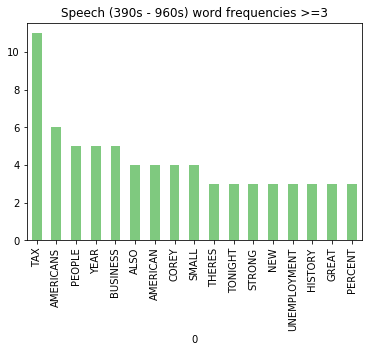

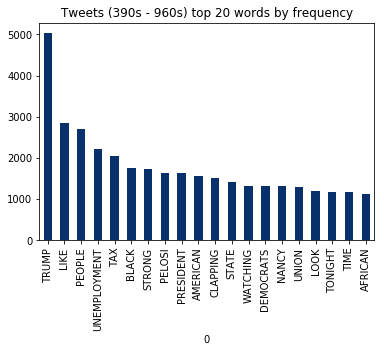

In [13]:
# For speech, call function to get frequency distribution for this time period
speech_390_960 = getWordFrequencies(speech.loc[(speech['timestamp'] >= 390) &  (speech['timestamp'] <= 960)], 'speech')
# For speech, put top words into table form (note: table was checked with top 20 words, then reduced to top 17 to reflect only frequencies of 3 or greater)
speech_390_960_table = getWordFrequencyTable(speech_390_960, 17)
# For speech, produce bar chart
getBarChart(speech_390_960_table, "Speech (390s - 960s) word frequencies >=3", "Accent")
# For tweets, call function to get frequency distribution for this time period
tweets_390_960 = getWordFrequencies(tweets.loc[(tweets['timestamp'] >= 390) &  (tweets['timestamp'] <= 960)], 'tweets')
# For tweets, put top words into table form
tweets_390_960_table = getWordFrequencyTable(tweets_390_960, 20)
# For tweets, produce bar chart
getBarChart(tweets_390_960_table, "Tweets (390s - 960s) top 20 words by frequency", "Blues_r")

## Analysis of seconds 1040-1520

(=8 minute duration)

In [14]:
# Loop to view the speech in full for seconds 1040-1520
b_10401520=""
for i in range(len(speech)):
    if ((speech.at[i, 'timestamp'] >= 1040) &  (speech.at[i,'timestamp'] <= 1520)):
        b_10401520+= (speech.at[i, 'content'])
print(b_10401520)

If you work hard if you believe in yourself
if you believe in America then you can dream anything you can be anything and
Together we can achieve
absolutely anything
Tonight I want to talk about what kind of future we're going to have and what kind of a nation we're going to be
All of us together as one team one people and one
American family can do anything
we all share the same home the same heart the same destiny and
the same great American flag
Together we are rediscovering
The American Way in America we know that faith and family not government and bureaucracy
or the center of American life
The motto is In God, We Trust
And
we celebrate our police our military and our amazing veterans as heroes who deserve our total and
unwavering support
Here tonight is Preston sharp a
12 year old boy from Redding, California
Who noticed that Veterans graves?
Were not marked with flags on Veterans Day
He decided role by himself to change that and started a movement that has now placed
40,000 flag

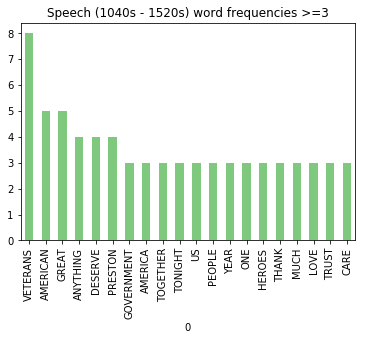

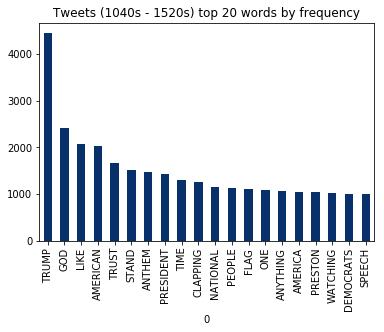

In [15]:
# For speech, call function to get frequency distribution for this time period
speech_1040_1520 = getWordFrequencies(speech.loc[(speech['timestamp'] >= 1040) &  (speech['timestamp'] <= 1520)], "speech")
# For speech, put 20 top words into table form (note: it was checked manually that the top 20 words comprised all those of frequency 3 or greater)
speech_1040_1520_table = getWordFrequencyTable(speech_1040_1520, 20)
# For speech, produce bar chart
getBarChart(speech_1040_1520_table, "Speech (1040s - 1520s) word frequencies >=3", "Accent")
# For tweets, call function to get frequency distribution for this time period
tweets_1040_1520 = getWordFrequencies(tweets.loc[(tweets['timestamp'] >= 1040) &  (tweets['timestamp'] <= 1520)], "tweets")
# For tweets, put top words into table form
tweets_1040_1520_table = getWordFrequencyTable(tweets_1040_1520, 20)
# For tweets, produce bar chart
getBarChart(tweets_1040_1520_table, "Tweets (1040s - 1520s) top 20 words by frequency", "Blues_r")

## Analysis of seconds 1520-1840

(=5.3 minute duration)

In [16]:
# Loop to view the speech in full for seconds 1520-1840
c_15201840=""
for i in range(len(speech)):
    if ((speech.at[i, 'timestamp'] >= 1520) &  (speech.at[i,'timestamp'] <= 1840)):
        c_15201840+= (speech.at[i, 'content'])
print(c_15201840)

In our drive to make Washington accountable we have eliminated more regulations in our first year than any
Administration in the history of our country
We have ended the war on American energy and we have ended the war on
beautiful clean coal
We are now very proudly an exporter of energy to the world
In Detroit I
Halted government mandates that crippled America's great
beautiful Auto Workers
So that we can get Motor City revving its engines again, and that's what's happening
Many car companies are now building and expanding plants in the United States
Something we haven't seen for decades
Chrysler is moving a major plant from Mexico to Michigan
Toyota and Mazda are opening up a plant in Alabama a big one
And we haven't seen this in a long time
It's all coming back
Very soon auto plants and other plants will be opening up all over our country
This is all news
Americans are
Totally unaccustomed to here for many years companies and jobs were only leaving us
but now
They are roaring back. 

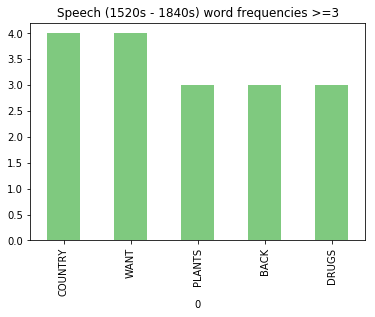

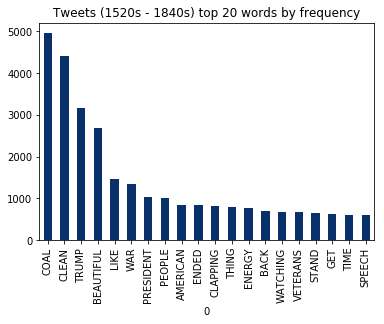

In [17]:
# For speech, call function to get frequency distribution for this time period
speech_1520_1840 = getWordFrequencies(speech.loc[(speech['timestamp'] >= 1520) &  (speech['timestamp'] <= 1840)], "speech")
# For speech, put top words into table form (note it was manually checked that in this case it was the top 5 that had frequency 3 or greater)
speech_1520_1840_table = getWordFrequencyTable(speech_1520_1840, 5)
# For speech, produce bar chart
getBarChart(speech_1520_1840_table, "Speech (1520s - 1840s) word frequencies >=3", "Accent")
# For tweets, call function to get frequency distribution for this time period
tweets_1520_1840 = getWordFrequencies(tweets.loc[(tweets['timestamp'] >= 1520) &  (tweets['timestamp'] <= 1840)], "tweets")
# For tweets, put top words into table form
tweets_1520_1840_table = getWordFrequencyTable(tweets_1520_1840, 20)
# For tweets, produce bar chart
getBarChart(tweets_1520_1840_table, "Tweets (1520s - 1840s) top 20 words by frequency", "Blues_r")

## Analysis of seconds 1840 - 2400

(=9.3 minutes)

In [18]:
# Loop to view the speech in full for seconds 1840 - 2400
d_18402400=""
for i in range(len(speech)):
    if ((speech.at[i, 'timestamp'] >= 1840) &  (speech.at[i,'timestamp'] <= 2400)):
        d_18402400+= (speech.at[i, 'content'])
print(d_18402400)

In many other countries these drugs cost far less
Than what we pay in the United States, and it's very very unfair
That is why I've directed my administration to make fixing the injustice of high drug prices
one of my top priorities for the year
And prices will come down substantially watch
America has also finally turned the page on decades of unfair trade deals that
sacrificed our prosperity and shipped away our companies our jobs and our
wealth our
Nation has lost its wealth, but we're getting it back so fast the era of economic
surrender is totally over from now on we expect trading relationships to be fair and
very importantly
reciprocal
We will work to fix bad trade deals and
Negotiate new ones, and they'll be good ones, but they'll be fair and we will protect
American workers and American
intellectual property
through strong enforcement of our trade rules
As we rebuild our industries it is also time to rebuild our crumbling infrastructure
America is a nation of builders. We buil

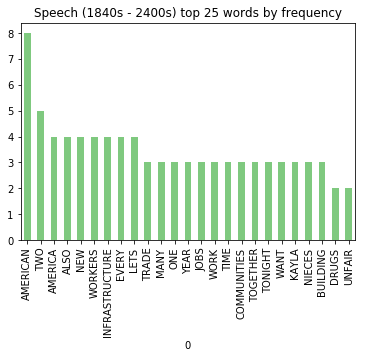

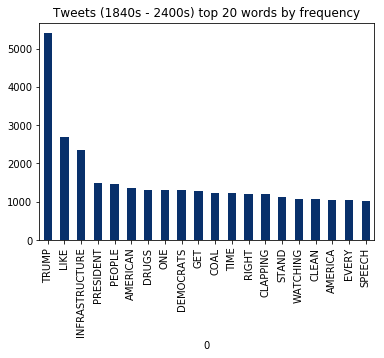

In [19]:
# For speech, call function to get frequency distribution for this time period
speech_1840_2400 = getWordFrequencies(speech.loc[(speech['timestamp'] >= 1840) &  (speech['timestamp'] <= 2400)], "speech")
# For speech, put top 25 words into table form
speech_1840_2400_table = getWordFrequencyTable(speech_1840_2400, 25)
# For speech, produce bar chart
getBarChart(speech_1840_2400_table, "Speech (1840s - 2400s) top 25 words by frequency", "Accent")
# For tweets, call function to get frequency distribution for this time period
tweets_1840_2400 = getWordFrequencies(tweets.loc[(tweets['timestamp'] >= 1840) &  (tweets['timestamp'] <= 2400)], "tweets")
# For tweets, put top words into table form
tweets_1840_2400_table = getWordFrequencyTable(tweets_1840_2400, 20)
# For tweets, produce bar chart
getBarChart(tweets_1840_2400_table, "Tweets (1840s - 2400s) top 20 words by frequency", "Blues_r")

# Analysis of seconds 2480 - 2880

(=6.7 minutes duration)

In [20]:
# Loop to view the speech in full for seconds 2480 - 2880
f_24802880=""
for i in range(len(speech)):
    if ((speech.at[i, 'timestamp'] >= 2480) &  (speech.at[i,'timestamp'] <= 2880)):
        f_24802880+= (speech.at[i, 'content'])
print(f_24802880)

danger
so that this can never
happen again
The United States is a compassionate nation
We are proud that we do more than any other country
Anywhere in the world to help the needy the struggling and the underprivileged all over the world
But as president of the United States my highest loyalty my greatest
Compassion my constant concern is for
America's children
America's struggling workers and America's forgotten communities I
Want our youth to grow up to achieve great things?
I want our poor to have their chance to rise
So tonight, I am extending an open hand to work with members of both parties
Democrats and Republicans to protect our citizens of every background color religion and Creed
My duty and the sacred duty of
Every elected official in this chamber is to defend Americans
To protect their safety their families their communities and their right to the American Dream
Because Americans are dreamers, too
Here tonight is one leader in the effort to defend our country
Homeland Securi

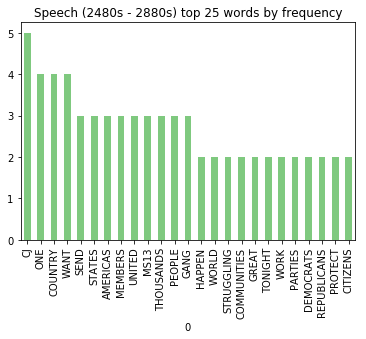

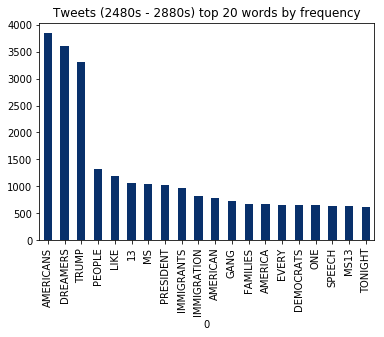

In [21]:
# For speech, call function to get frequency distribution for this time period
speech_2480_2880 = getWordFrequencies(speech.loc[(speech['timestamp'] >= 2480) &  (speech['timestamp'] <= 2880)], "speech")
# For speech, put top 25 words into table form
speech_2480_2880_table = getWordFrequencyTable(speech_2480_2880, 25)
# For speech, produce bar chart
getBarChart(speech_2480_2880_table, "Speech (2480s - 2880s) top 25 words by frequency", "Accent")
# For tweets, call function to get frequency distribution for this time period
tweets_2480_2880 = getWordFrequencies(tweets.loc[(tweets['timestamp'] >= 2480) &  (tweets['timestamp'] <= 2880)], "tweets")
# For tweets, put top words into table form
tweets_2480_2880_table = getWordFrequencyTable(tweets_2480_2880, 20)
# For tweets, produce bar chart
getBarChart(tweets_2480_2880_table, "Tweets (2480s - 2880s) top 20 words by frequency", "Blues_r")

## Analysis of seconds 2880 - 3360

(=8m duration)

In [22]:
# Loop to view the speech in full for seconds 2880 - 3360
g_28803360=""
for i in range(len(speech)):
    if ((speech.at[i, 'timestamp'] >= 2880) &  (speech.at[i,'timestamp'] <= 3360)):
        g_28803360+= (speech.at[i, 'content'])
print(g_28803360)

That means building a great wall on the southern border and it means hiring more heroes like CJ to keep
our communities safe
Crucially our plan closes the terrible loopholes
exploited by criminals and terrorists to enter our country, and it finally ends the horrible and
dangerous practice of catch and release
The third pillar
Ends the visa lottery a program that randomly hands out green cards without any regard for skill
merit or the safety of
American people
It's time to begin moving toward a merit-based
immigration system one that admits people who are skilled who want to work who will contribute to our society and
Who will love and respect our country?
The fourth and final pillar protects the nuclear family by ending chain migration
Under the current broken system a single immigrant can bring in virtually unlimited
numbers of
distant relatives
under our plan
We focus on the immediate family by limiting sponsorships to spouses and minor children
This vital reform is necessary not jus

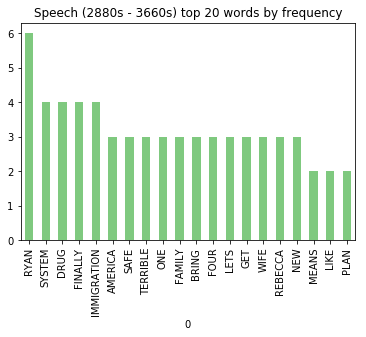

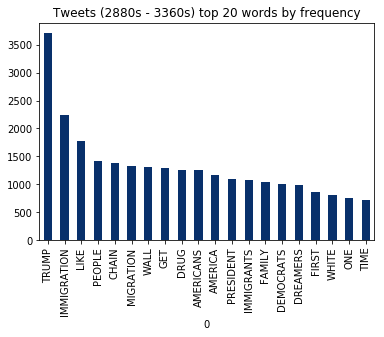

In [23]:
# For speech, call function to get frequency distribution for this time period
speech_2880_3360 = getWordFrequencies(speech.loc[(speech['timestamp'] >= 2880) &  (speech['timestamp'] <= 3360)], "speech")
# For speech, put top 20 words into table form
speech_2880_3360_table = getWordFrequencyTable(speech_2880_3360, 20)
# For speech, produce bar chart
getBarChart(speech_2880_3360_table, "Speech (2880s - 3660s) top 20 words by frequency", "Accent")
# For tweets, call function to get frequency distribution for this time period
tweets_2880_3360 = getWordFrequencies(tweets.loc[(tweets['timestamp'] >= 2880) &  (tweets['timestamp'] <= 3360)], "tweets")
# For tweets, put top words into table form
tweets_2880_3360_table = getWordFrequencyTable(tweets_2880_3360, 20)
# For tweets, produce bar chart
getBarChart(tweets_2880_3360_table, "Tweets (2880s - 3360s) top 20 words by frequency", "Blues_r")


## Analysis of seconds 3360 - 4320

(=16 minute duration)

In [24]:
# Loop to view the speech in full for seconds 3360 - 4320
h_33604320=""
for i in range(len(speech)):
    if ((speech.at[i, 'timestamp'] >= 3360) &  (speech.at[i,'timestamp'] <= 4320)):
        h_33604320+= (speech.at[i, 'content'])
print(h_33604320)

Thank You Ryan and Rebecca
as
We rebuild America's strength and confidence at home. We are also restoring our strength and standing abroad
Around the world we face rogue regimes
terrorist groups and
rivals like China and Russia
That challenge our interests our economy and our values in confronting these
horrible dangers we know that weakness is the surest path to conflict and
Unmatched power is the surest means to our true and great defense
for this reason I am asking Congress to end the
dangerous defense sequester and fully fund our great
military
As
part of our defense
We must modernize and rebuild our nuclear arsenal
Hopefully never having to use it, but making it so strong and so powerful
That it will deter any acts of aggression by any other nation or anyone else
Perhaps someday in the future there will be a magical moment
When the countries of the world will get together to eliminate
their nuclear weapons
Unfortunately we are not there yet sadly
Last year I also pledged that we w

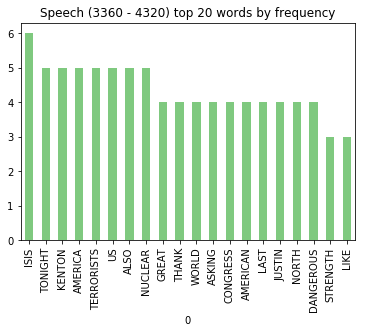

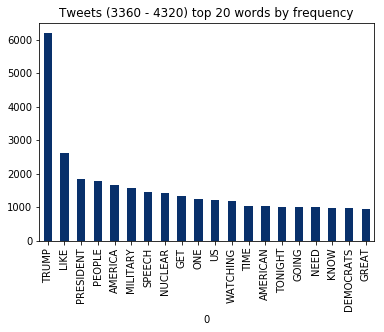

In [25]:
# For speech, call function to get frequency distribution for this time period
speech_3360_4320 = getWordFrequencies(speech.loc[(speech['timestamp'] >= 3360) &  (speech['timestamp'] <= 4320)], "speech")
# For speech, put top 20 words into table form
speech_3360_4320_table = getWordFrequencyTable(speech_3360_4320, 20)
# For speech, produce bar chart
getBarChart(speech_3360_4320_table, "Speech (3360 - 4320) top 20 words by frequency", "Accent")
# For tweets, call function to get frequency distribution for this time period
tweets_3360_4320 = getWordFrequencies(tweets.loc[(tweets['timestamp'] >= 3360) &  (tweets['timestamp'] <= 4320)], "tweets")
# For tweets, put top words into table form
tweets_3360_4320_table = getWordFrequencyTable(tweets_3360_4320, 20)
# For tweets, produce bar chart
getBarChart(tweets_3360_4320_table, "Tweets (3360 - 4320) top 20 words by frequency", "Blues_r")


## Analysis of seconds 4480 - end

In [26]:
# Loop to view the speech in full for seconds 4480 - end
i_4480toend=""
for i in range(len(speech)):
    if ((speech.at[i, 'timestamp'] >= 4480)):
        i_4480toend+= (speech.at[i, 'content'])
print(i_4480toend)

Seungho's story is a testament to the yearning of every human soul to live in freedom
It was that same yearning for freedom that nearly two hundred and fifty years ago gave birth to a special place
called America
It was a small cluster of colonies caught between a great ocean and a vast wilderness
It was home to an incredible people
with a
revolutionary idea that
They could rule
themselves. That they could chart their own destiny and that
together
They could light up the entire world
That is what our country has always been about
That is what Americans have always stood for
always strived for and
always done
atop the dome of this Capitol
stands the statue of freedom
She stands tall and dignified among
The monuments to our ancestors who fought and lived and died to protect her
monuments to Washington and Jefferson and Lincoln and King
Memorials to the heroes of Yorktown and
Saratoga
to young Americans who shed their blood
on the shores of Normandy and
the fields beyond and
others who we

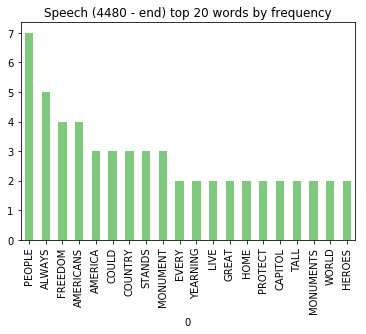

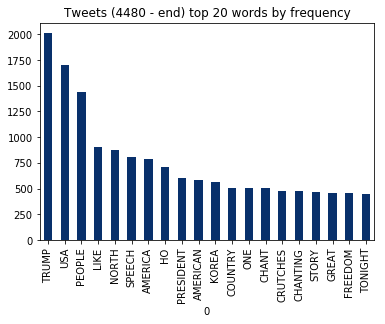

In [27]:
# For speech, call function to get frequency distribution for this time period
speech_4480_end = getWordFrequencies(speech.loc[(speech['timestamp'] >= 4480)], "speech")
# For speech, put top 20 words into table form
speech_4480_end_table = getWordFrequencyTable(speech_4480_end, 20)
# For speech, produce bar chart
getBarChart(speech_4480_end_table, "Speech (4480 - end) top 20 words by frequency", "Accent")
# For tweets, call function to get frequency distribution for this time period
tweets_4480_end = getWordFrequencies(tweets.loc[(tweets['timestamp'] >= 4480)], "tweets")
# For tweets, put top words into table form
tweets_4480_end_table = getWordFrequencyTable(tweets_4480_end, 20)
# For tweets, produce bar chart
getBarChart(tweets_4480_end_table, "Tweets (4480 - end) top 20 words by frequency", "Blues_r")
